# Hydrologi

Me skal analysera vassføringsdata lasta ned frå sildre.nve.no. Arbeidet her er basert på data frå Reinsnos som har data tilbake til 1917. 

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
url = "https://raw.githubusercontent.com/lektorodd/Geofag-1/main/Hydrologi%20-%20vassf%C3%B8ring/vassf%C3%B8ring_reinsnos.csv"

In [59]:
df = pd.read_csv(url, sep = ";", skiprows = 2, 
                 names = ["dato", "Vassføring", "Korr", "Kontr"],
                 parse_dates = True, decimal = ",")

df.index = pd.to_datetime(df["dato"])
df.index = df.index.date
df = df.drop(columns = ["dato", "Korr", "Kontr"])

df.index = pd.to_datetime(df.index)

In [18]:
df.head()

,Vassføring
1917-06-15,19.06312
1917-06-16,16.46433
1917-06-17,16.46433
1917-06-18,18.67722
1917-06-19,21.97948


<AxesSubplot:>

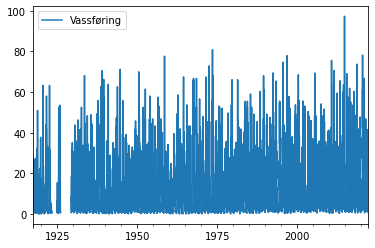

In [19]:
df.plot()

## Middelflom

Middelflom - største døgnvassføring per år over eit lengre tidsrom (ofte 20-30 år). 

In [17]:
årleg_maks = df.groupby(by = [df.index.year]).max()

<AxesSubplot:>

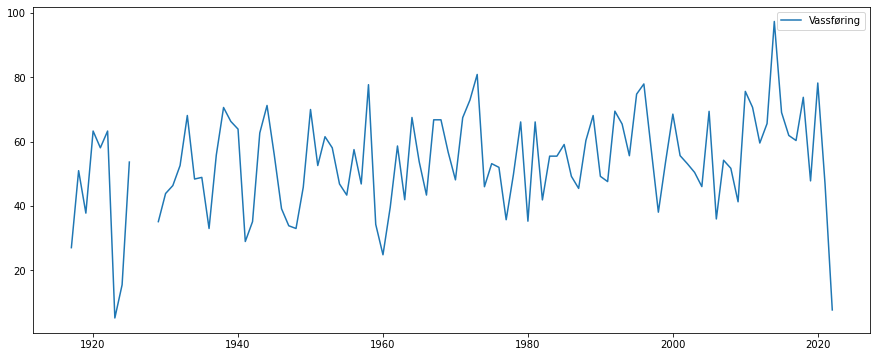

In [21]:
årleg_maks.plot(figsize = (15,6))

In [22]:
årleg_maks = df.groupby(by = [df.index.year]).max()
årleg_maks = årleg_maks.loc[1930:2021]
årleg_maks["middelflom (30 år)"] = årleg_maks.rolling(window = 30).mean()

årleg_maks.head()

,Vassføring,middelflom (30 år)
1930,43.82251,NaN
1931,46.29647,NaN
1932,52.52979,NaN
1933,68.09634,NaN
1934,48.32775,NaN


In [23]:
årleg_maks.tail()

,Vassføring,middelflom (30 år)
2017,60.31381,60.123230
2018,73.75180,60.571163
2019,47.75206,59.893282
2020,78.19958,60.860965
2021,46.81937,60.837067


<AxesSubplot:>

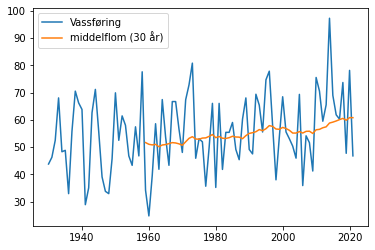

In [24]:
årleg_maks.plot()

### Modell for middelflom

Lineær modell for middelflom vha. polyfit frå numpy. 

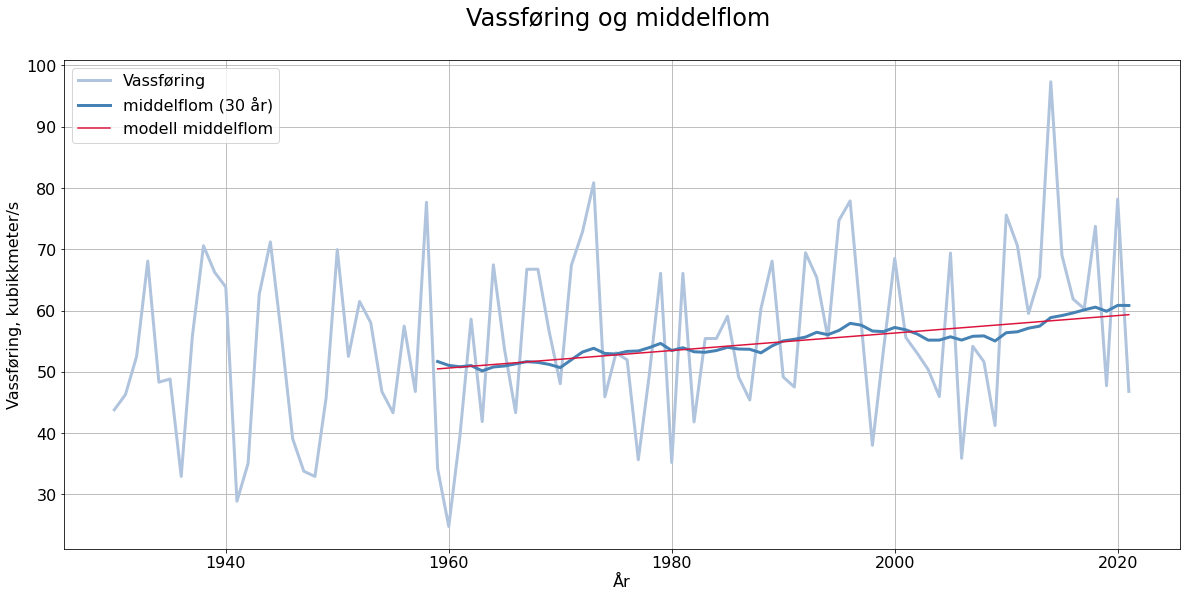

In [31]:
x = np.arange(1959, 2022)

a, b = np.polyfit(x, årleg_maks["middelflom (30 år)"].loc[1959:2021], 1)

def f(x):
    return a*x + b

årleg_maks.plot(figsize = (20, 9), grid = True, fontsize = 16, linewidth = 3,
                color = ["lightsteelblue", "steelblue"])

plt.plot(x, f(x), linewidth = 1.5, 
         label = "modell middelflom", 
         color = "crimson")

# pynte plottet
plt.title("Vassføring og middelflom \n", fontsize = 24)
plt.legend(fontsize = 16)
plt.ylabel("Vassføring, kubikkmeter/s", fontsize = 16)
plt.xlabel("År", fontsize = 16)
#plt.savefig("Reinsnos - årleg vassføring og middelflom.png", dpi = 300)
plt.show()

## Vassføring per dag

Me skal sjå på korleis vassføringa har vore på dei ulike dagane i året frå 1917 til 2022. 


**OBS: les inn datamaterialet i starten før du køyrer dette igjen...**

In [32]:
df.shape

(38264, 1)

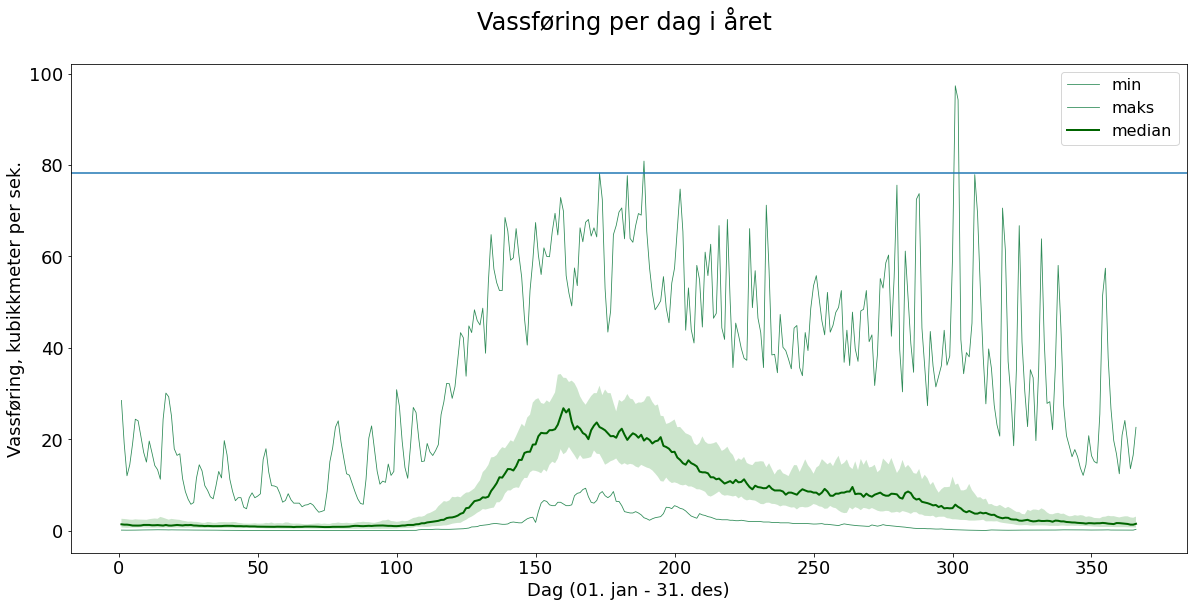

In [64]:
#df = df.rolling(window = 10, center = True, win_type = "triang").mean()

df["doy"] = df.index.dayofyear
df["år"] = df.index.year

piv = pd.pivot_table(
    df, index=["doy"], columns = ["år"], 
    values = ["Vassføring"])

# legg til kolonner med min, maks, 25- og 75 persentilar og median
piv["min"] = piv.min(axis = 1)
piv["maks"] = piv.max(axis = 1)
piv["25%"] = piv.quantile(q = 0.25, axis = 1)
piv["median"] = piv.median(axis = 1)
piv["75%"] = piv.quantile(q = 0.75, axis = 1)

# plottar
piv["min"].plot(figsize = (20, 9), 
                          color = "seagreen", 
                          linewidth = 0.8, 
                          grid = False, 
                          fontsize = 18, 
                          legend = False) 

piv["maks"].plot(color = "seagreen", 
                          linewidth = 0.8, 
                          grid = False, 
                          fontsize = 18, 
                          legend = False) 

plt.fill_between(piv.index, piv["25%"], piv["75%"], 
                 facecolor='green', 
                 alpha=0.2, 
                 interpolate=True)

piv["median"].plot(linewidth = 2, color = "darkgreen")

#plt.axhline(y = 80)
plt.axhline(y = 78.28)
# pynting
plt.xlabel("Dag (01. jan - 31. des)", fontsize = 18)
plt.ylabel("Vassføring, kubikkmeter per sek.", fontsize = 18)
plt.title("Vassføring per dag i året \n", fontsize = 24)
plt.legend(fontsize = 16)
#plt.savefig("Reinsnos - vassføring per dag gjennom året.png", dpi = 300)
plt.show()

In [42]:
piv

Vassføring                                                              \
år        1917      1918      1919      1920      1921      1922      1923   
doy                                                                          
1          NaN  0.751369  0.520992  0.110245  0.520992  2.268141  0.858653   
2          NaN  0.751369  0.481094  0.095431  0.562897  2.268141  0.751369   
3          NaN  0.701046  0.443164  0.095431  0.606849  2.166990  0.803893   
4          NaN  0.701046  0.407161  0.095431  0.652886  1.973261  0.915689   
5          NaN  0.652886  0.373045  0.110245  0.803893  1.703600  0.915689   
..         ...       ...       ...       ...       ...       ...       ...   
362   0.803893  0.520992  0.126418  0.481094  2.166990  1.100814       NaN   
363   0.803893  0.701046  0.110245  0.481094  2.372195  1.036733       NaN   
364   0.803893  0.701046  0.110245  0.481094  2.372195  1.036733       NaN   
365   0.751369  0.520992  0.110245  0.481094  2.268141  0.975036       NaN   
366        NaN       NaN       NaN  0.481094       NaN       NaN       NaN   

                                   ...                                  \
år       1924      1925      1929  ...      2018       2019       2020   
doy                                ...                                   
1         NaN  4.303123       NaN  ...  4.161459   2.347107  12.096400   
2         NaN  4.003652       NaN  ...  3.759124   2.669421   8.641389   
3         NaN  3.858951       NaN  ...  3.438255   2.515568   8.580434   
4         NaN  3.717565       NaN  ...  3.053644   2.336836   7.108252   
5         NaN  3.444615       NaN  ...  2.739008   2.265773   5.907576   
..        ...       ...       ...  ...       ...        ...        ...   
362  5.639699  0.751369  1.036733  ...  0.784295   1.681632   3.393838   
363  5.111953  0.803893  1.100814  ...  0.852731   2.817787   3.343387   
364  4.777958  0.858653  1.167316  ...  0.898501  13.367420   3.049249   
365  4.777958  0.858653  1.236275  ...  1.067877  16.541520   2.822737   
366  4.457954       NaN       NaN  ...       NaN        NaN   2.640175   

                              min      maks       25%    median       75%  
år       2021      2022                                                    
doy                                                                        
1    2.466642  4.124214  0.110245  28.48319  0.664926  1.380413  2.589138  
2    2.288357  5.344579  0.095431  19.01132  0.652886  1.309450  2.548025  
3    2.122319  6.083396  0.095431  11.99520  0.606849  1.309450  2.485363  
4    1.954245  5.640584  0.095431  14.41007  0.652886  1.236275  2.397000  
5    1.806864  4.668677  0.110245  18.95604  0.671827  1.111229  2.372195  
..        ...       ...       ...       ...       ...       ...       ...  
362  1.482176       NaN  0.126418  24.10638  0.751369  1.522816  3.130804  
363  1.344785       NaN  0.110245  19.34732  0.715639  1.456071  3.130804  
364  1.437221       NaN  0.110245  13.55378  0.714850  1.308588  2.888078  
365  2.790280       NaN  0.110245  16.54152  0.701046  1.302970  2.818080  
366       NaN       NaN  0.271340  22.60136  0.676966  1.495146  3.059279  

[366 rows x 108 columns]